In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Всего записей: 356981
Количество записей, использующие multiselect: 183148
Процент записей с multiselect: 51.30%
Всего записей: 356981
Количество записей с response_status 200: 175510
Количество записей с response_status 499: 2935
Количество записей с response_status 301: 178527
Количество записей с response_status 404: 9
Количество записей с multiselect и response_status 200: 175506
Количество записей с multiselect и response_status 301: 4807
Количество записей с multiselect и response_status 499: 2826
Количество записей с multiselect и response_status 404: 9
Процент записей с multiselect и response_status 200: 49.16%
Процент записей с multiselect и response_status 301: 1.35%
Процент записей с multiselect и response_status 499: 0.79%
Процент записей с multiselect и response_status 404: 0.00%


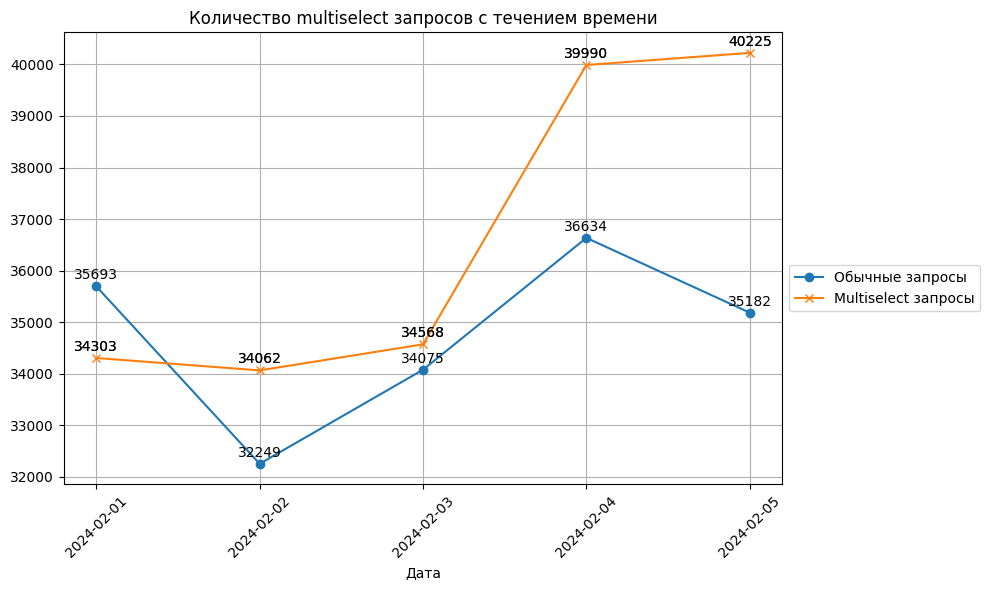

In [2]:
logs = pd.read_csv("access_log_202406061509.csv", sep=';')
logs2 = pd.read_csv("access_log_202406061509_2.csv", sep=";")

data = pd.concat([logs, logs2])
data['dt'] = pd.to_datetime(data['dt'], format='%Y-%m-%d')

multiselect_count = data['uri'].str.count('multiselect').gt(1).sum()
total_count = len(data)

percentage_first = (multiselect_count / total_count) * 100

print(f"Всего записей: {total_count}")
print(f"Количество записей, использующие multiselect: {multiselect_count}")
print(f"Процент записей с multiselect: {percentage_first:.2f}%")


# Подсчет multiselect по response_status (200, 301, 499)
print("==================================================")
data['is_multisearch'] = data['uri'].str.count('multiselect') > 1

data_200 = data[data['response_status'] == 200]
data_301 = data[data['response_status'] == 301]
data_499 = data[data['response_status'] == 499]
data_404 = data[data['response_status'] == 404]

total_count = len(data)
multiselect_count_200 = data_200['is_multisearch'].sum()
multiselect_count_301 = data_301['is_multisearch'].sum()
multiselect_count_499 = data_499['is_multisearch'].sum()
multiselect_count_404 = data_404['is_multisearch'].sum()

total_count_200 = len(data_200)
total_count_301 = len(data_301)
total_count_499 = len(data_499)
total_count_404 = len(data_404)

percentage_multiselect_200 = (multiselect_count_200 / total_count) * 100
percentage_multiselect_301 = (multiselect_count_301 / total_count) * 100
percentage_multiselect_499 = (multiselect_count_499 / total_count) * 100
percentage_multiselect_404 = (multiselect_count_404 / total_count) * 100

print(f"Всего записей: {total_count}")
print(f"Количество записей с response_status 200: {total_count_200}")
print(f"Количество записей с response_status 499: {total_count_499}")
print(f"Количество записей с response_status 301: {total_count_301}")
print(f"Количество записей с response_status 404: {total_count_404}")

print(f"Количество записей с multiselect и response_status 200: {multiselect_count_200}")
print(f"Количество записей с multiselect и response_status 301: {multiselect_count_301}")
print(f"Количество записей с multiselect и response_status 499: {multiselect_count_499}")
print(f"Количество записей с multiselect и response_status 404: {multiselect_count_404}")

print(f"Процент записей с multiselect и response_status 200: {percentage_multiselect_200:.2f}%")
print(f"Процент записей с multiselect и response_status 301: {percentage_multiselect_301:.2f}%")
print(f"Процент записей с multiselect и response_status 499: {percentage_multiselect_499:.2f}%")
print(f"Процент записей с multiselect и response_status 404: {percentage_multiselect_404:.2f}%")

multiselect_data = data[data['uri'].str.count('multiselect') > 1]
multiselect_counts = multiselect_data['dt'].value_counts().sort_index()

single_multiselect_data = data[data['uri'].str.count('multiselect') == 1]
single_multiselect_counts = single_multiselect_data['dt'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(single_multiselect_counts.index, single_multiselect_counts.values, marker='o', label='Обычные запросы')
for i, count in enumerate(single_multiselect_counts.values):
    plt.annotate(str(count), (single_multiselect_counts.index[i], count), textcoords="offset points", xytext=(0, 5), ha='center')

plt.plot(multiselect_counts.index, multiselect_counts.values, marker='x', label='Multiselect запросы')
for i, count in enumerate(multiselect_counts.values):
    plt.annotate(str(count), (multiselect_counts.index[i], count), textcoords="offset points", xytext=(0, 5), ha='center')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xlabel('Дата')
for i, count in enumerate(multiselect_counts.values):
    plt.annotate(str(count), (multiselect_counts.index[i], count), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Количество multiselect запросов с течением времени')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())


plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('multiselect_count.png')
plt.show()